In [114]:
#the packages used
import pandas as pd
import sqlite3
from tqdm.notebook import tqdm

import matplotlib.pyplot as plt
import numpy as np

import seaborn as sns

In [115]:
#checking the tables in the sqlite_db

db = sqlite3.connect('../data/ehr.sqlite')
db.execute("""SELECT 
    name
FROM 
    sqlite_schema
WHERE 
    type ='table' AND 
    name NOT LIKE 'sqlite_%';""").fetchall()

[('patients',), ('admission',), ('diagicd',), ('ictarget',)]

In [178]:
#patient

query = """
SELECT *
FROM patients


"""

with sqlite3.connect('../data/ehr.sqlite') as db: 
       pts= pd.read_sql(query, db)
pts.head(3)

,unnamed:_0,subject_id,gender,anchor_age,anchor_year,anchor_year_group,dod,min_year_group,max_year_group,min_age,base_anchor_year
0,0,10000032,F,52,2180,2014 - 2016,2180-09-09 00:00:00,2014,2016,44,2174
1,1,10000048,F,23,2126,2008 - 2010,0,2008,2010,21,2126
2,2,10000068,F,19,2160,2008 - 2010,0,2008,2010,17,2160


<Axes: xlabel='min_age', ylabel='gender'>

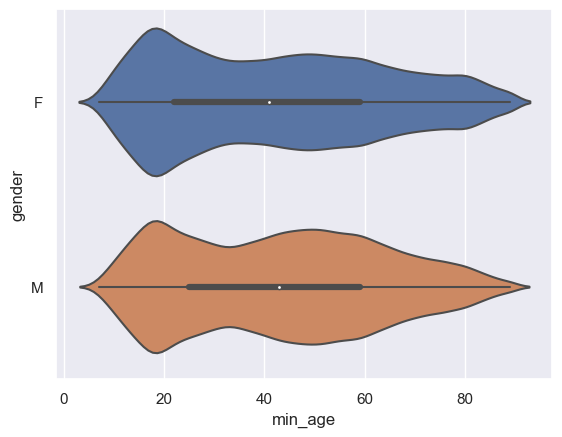

In [244]:
sns.violinplot(data=pts, x="min_age", y="gender")

In [245]:
pts['min_age'].describe()

count    299712.000000
mean         42.576023
std          21.135918
min           7.000000
25%          23.000000
50%          42.000000
75%          59.000000
max          89.000000
Name: min_age, dtype: float64

[Text(0.5, 1.0, 'Genderwise distribution of age among live and dead population'),
 Text(0.5, 0, 'GENDER (F:Female; M:Male)'),
 Text(0, 0.5, 'AGE(years)')]

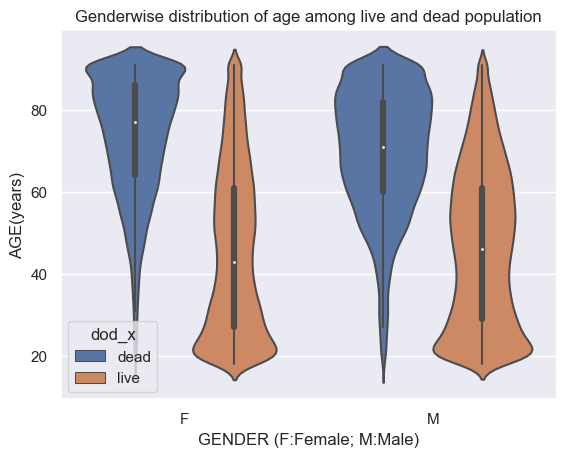

In [243]:
pts['dod_x'] = np.where(pts['dod'] == '0', 'live', 'dead')
pts.head(3)
(sns.violinplot(data=pts, y="anchor_age", x="gender", hue="dod_x").set(title = 'Genderwise distribution of age among live and dead population',
                                                                   xlabel='GENDER (F:Female; M:Male)', ylabel='AGE(years)'))


In [190]:
#ictarget

query = """
SELECT *
FROM ictarget

"""

with sqlite3.connect('../data/ehr.sqlite') as db: 
    ictar = pd.read_sql(query, db)
ictar.head()

,unnamed:_0,subject_id,hadm_id,icd_e11,icd_e78,icd_e87,icd_f32,icd_i16,icd_i50,icd_n17,icd_y92,icd_z85
0,0,10000032,22841357,0,0,1,0,0,0,0,0,0
1,1,10000032,25742920,0,0,1,0,0,0,0,0,0
2,2,10000032,29079034,0,0,1,0,0,0,0,0,0
3,3,10000084,23052089,0,1,0,0,0,0,0,0,1
4,4,10000117,27988844,0,1,0,0,0,0,0,1,0


In [189]:
#ictarget

query = """
SELECT *
FROM admission


"""

with sqlite3.connect('../data/ehr.sqlite') as db: 
    adm = pd.read_sql(query, db)
adm.head(5)


,subject_id,hadm_id,admittime,dischtime,deathtime,admission_type,admit_provider_id,admission_location,discharge_location,insurance,language,marital_status,race,edregtime,edouttime,hospital_expire_flag
0,10000032,22595853,2180-05-06 22:23:00,2180-05-07 17:15:00,None,URGENT,P874LG,TRANSFER FROM HOSPITAL,HOME,Other,ENGLISH,WIDOWED,WHITE,2180-05-06 19:17:00,2180-05-06 23:30:00,0
1,10000032,22841357,2180-06-26 18:27:00,2180-06-27 18:49:00,None,EW EMER.,P09Q6Y,EMERGENCY ROOM,HOME,Medicaid,ENGLISH,WIDOWED,WHITE,2180-06-26 15:54:00,2180-06-26 21:31:00,0
2,10000032,25742920,2180-08-05 23:44:00,2180-08-07 17:50:00,None,EW EMER.,P60CC5,EMERGENCY ROOM,HOSPICE,Medicaid,ENGLISH,WIDOWED,WHITE,2180-08-05 20:58:00,2180-08-06 01:44:00,0
3,10000032,29079034,2180-07-23 12:35:00,2180-07-25 17:55:00,None,EW EMER.,P30KEH,EMERGENCY ROOM,HOME,Medicaid,ENGLISH,WIDOWED,WHITE,2180-07-23 05:54:00,2180-07-23 14:00:00,0
4,10000068,25022803,2160-03-03 23:16:00,2160-03-04 06:26:00,None,EU OBSERVATION,P51VDL,EMERGENCY ROOM,None,Other,ENGLISH,SINGLE,WHITE,2160-03-03 21:55:00,2160-03-04 06:26:00,0


In [231]:
adm['marital_status'].value_counts()
adm['insurance'].value_counts()

(adm.groupby(['race','marital_status', 'insurance'])['subject_id'].nunique()
 .to_frame().reset_index().rename(columns={'subject_id':'number_of_patients'})
 .sort_values('number_of_patients', ascending=False)
    .iloc[150:200])

,race,marital_status,insurance,number_of_patients
169,HISPANIC/LATINO - DOMINICAN,DIVORCED,Other,79
97,BLACK/CAPE VERDEAN,DIVORCED,Other,78
110,BLACK/CARIBBEAN ISLAND,MARRIED,Medicaid,78
199,HISPANIC/LATINO - HONDURAN,SINGLE,Other,77
182,HISPANIC/LATINO - GUATEMALAN,MARRIED,Medicaid,76
136,HISPANIC/LATINO - CENTRAL AMERICAN,MARRIED,Other,74
258,NATIVE HAWAIIAN OR OTHER PACIFIC ISLANDER,SINGLE,Other,72
224,HISPANIC/LATINO - PUERTO RICAN,WIDOWED,Medicare,72
225,HISPANIC/LATINO - PUERTO RICAN,WIDOWED,Other,71
393,WHITE - RUSSIAN,WIDOWED,Other,70


C:\Users\upadh\anaconda3\lib\site-packages\seaborn\categorical.py:3544: UserWarning: 78.6% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\upadh\anaconda3\lib\site-packages\seaborn\categorical.py:3544: UserWarning: 68.7% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\upadh\anaconda3\lib\site-packages\seaborn\categorical.py:3544: UserWarning: 79.6% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


[Text(0.5, 1.0, 'Insurance and Marital_status of the population'),
 Text(0.5, 20.049999999999997, 'MARITAL STATUS'),
 Text(18.75, 0.5, 'NUMBER OF PATIENTS')]

C:\Users\upadh\anaconda3\lib\site-packages\seaborn\categorical.py:3544: UserWarning: 82.7% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\upadh\anaconda3\lib\site-packages\seaborn\categorical.py:3544: UserWarning: 72.7% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\upadh\anaconda3\lib\site-packages\seaborn\categorical.py:3544: UserWarning: 83.7% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


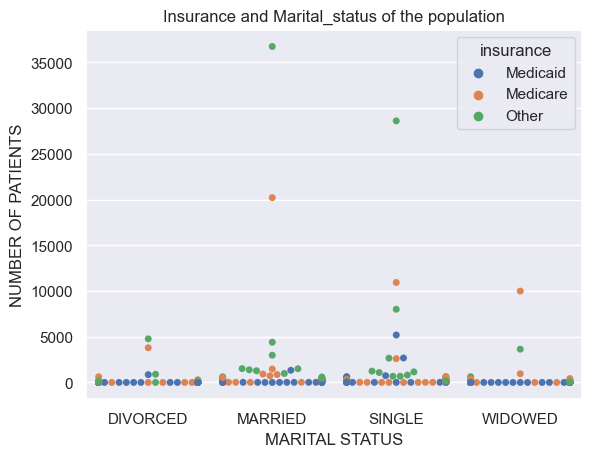

In [291]:
df = (adm.groupby(['race','marital_status', 'insurance'])['subject_id'].nunique()
      .to_frame().reset_index().rename(columns={'subject_id':'number_of_patients'}))

(sns.swarmplot(data=df, hue="insurance", y="number_of_patients", x='marital_status')
 .set(title = 'Insurance and Marital_status of the population',
      xlabel='MARITAL STATUS', ylabel='NUMBER OF PATIENTS'))

In [294]:
df.sort_values('number_of_patients', ascending=False)

,race,marital_status,insurance,number_of_patients
339,WHITE,MARRIED,Other,36742
342,WHITE,SINGLE,Other,28603
338,WHITE,MARRIED,Medicare,20208
341,WHITE,SINGLE,Medicare,10931
344,WHITE,WIDOWED,Medicare,9990
...,...,...,...,...
247,MULTIPLE RACE/ETHNICITY,WIDOWED,Medicaid,1
9,AMERICAN INDIAN/ALASKA NATIVE,WIDOWED,Medicaid,1
48,ASIAN - KOREAN,DIVORCED,Medicare,1
56,ASIAN - KOREAN,WIDOWED,Medicaid,1


<Axes: xlabel='number_of_patients', ylabel='race'>

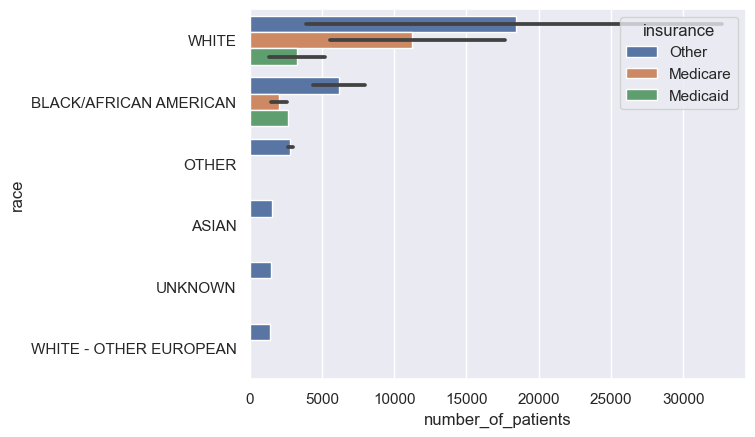

In [239]:
df = (adm.groupby(['race','marital_status', 'insurance'])['subject_id'].nunique()
      .to_frame().reset_index().rename(columns={'subject_id':'number_of_patients'})
      .sort_values('number_of_patients', ascending=False)).head(20)
sns.barplot(data=df, y="race", x="number_of_patients", hue='insurance')

<Axes: xlabel='number_of_observations', ylabel='admission_type'>

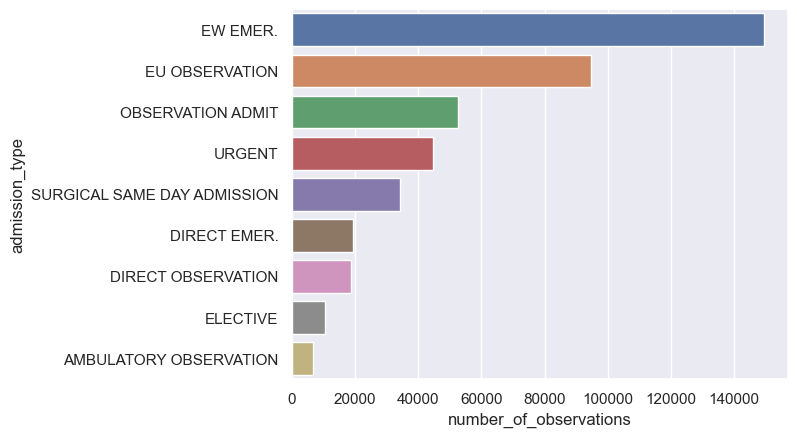

In [201]:
df = adm['admission_type'].value_counts().to_frame().reset_index().rename(columns={'index':'admission_type',
                                                                             'admission_type': 'number_of_observations'})

sns.barplot(data=df, y="admission_type", x="number_of_observations")

In [ ]:
#ictarget

query = """
SELECT *
FROM 
LIMIT 3

"""

with sqlite3.connect('../data/ehr.sqlite') as db: 
    adm = pd.read_sql(query, db)
adm

In [120]:
#ictarget

query = """
SELECT *
FROM diagicd

"""

with sqlite3.connect('../data/ehr.sqlite') as db: 
    icd = pd.read_sql(query, db)
icd.head()

,unnamed:_0,subject_id,hadm_id,icd10cm,long_title,icd
0,0,10000032,22595853,K766,Portal hypertension,K76
1,1,10000826,20032235,K766,Portal hypertension,K76
2,2,10000826,28289260,K766,Portal hypertension,K76
3,3,10005866,26158160,K766,Portal hypertension,K76
4,4,10008924,23676183,K766,Portal hypertension,K76
...,...,...,...,...,...,...
4756321,4756321,19990427,29695607,T24011A,"Burn of unspecified degree of right thigh, ini...",T24
4756322,4756322,19996016,28015466,O30093,"Twin pregnancy, unable to determine number of ...",O30
4756323,4756323,19996783,25894657,H353131,"Nonexudative age-related macular degeneration,...",H35
4756324,4756324,19997062,20096107,K8036,Calculus of bile duct with acute and chronic c...,K80


In [121]:
icd['icd'].nunique()

1892

In [137]:
icd['subject_id'].nunique()
(icd.groupby('subject_id')['hadm_id'].nunique().sort_values(ascending=False).reset_index()
.rename(columns={'hadm_id': 'number_of_visits'}))

,subject_id,number_of_visits
0,15496609,238
1,15464144,185
2,10714009,163
3,16662316,142
4,15229574,130
...,...,...
180635,15261612,1
180636,15261543,1
180637,15261532,1
180638,15261461,1


In [176]:
df = (icd.groupby('subject_id')['hadm_id'].nunique().sort_values(ascending=False).reset_index()
.rename(columns={'hadm_id': 'number_of_visits'}))
round(df['number_of_visits'].mean(), 2) #2.39
df['number_of_visits'].describe()
a = df.loc[(df['number_of_visits']  <5) & (df['number_of_visits']>0)].nunique()
b = df.loc[(df['number_of_visits']  <10) & (df['number_of_visits']>5)].nunique()
c = df.loc[(df['number_of_visits']  <50) & (df['number_of_visits']>10)].nunique()
d = df.loc[(df['number_of_visits']  <100) & (df['number_of_visits']>50)].nunique()
e = df.loc[(df['number_of_visits']  <250) & (df['number_of_visits']>100)].nunique()

# x = [a.subject_id, b.subject_id, c.subject_id, d.subject_id, e.subject_id]
x= {'number_of_visits':['1-5', '6-10', '11-50', '50-100', '101-250'],
    'number_of_patients':[a.subject_id, b.subject_id, c.subject_id, d.subject_id, e.subject_id]
#    'count':[a.number_of_visits, b.number_of_visits, c.number_of_visits,d.number_of_visits,e.number_of_visits]
   }

In [177]:
number_of_visits = pd.DataFrame.from_dict(x)
number_of_visits

,number_of_visits,number_of_patients
0,0-5,161491
1,6-10,8639
2,11-50,4273
3,50-100,81
4,101-250,6


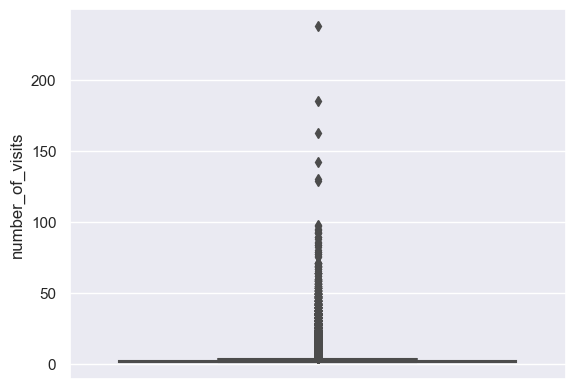

In [141]:
sns.set(style="darkgrid")
df = (icd.groupby('subject_id')['hadm_id'].nunique().sort_values(ascending=False).reset_index()
.rename(columns={'hadm_id': 'number_of_visits'}))

sns.boxplot(data=df, y="number_of_visits")
plt.show()

In [5]:
query="""
SELECT COUNT(DISTINCT subject_id) as patient_count
FROM ictarget
"""
with sqlite3.connect('../data/ehr.sqlite') as db: 
    pat_count = pd.read_sql(query, db)
pat_count

,patient_count
0,115012


In [29]:
query="""
SELECT p.subject_id, p.dod, p.min_age, ic.icd_E11, a.race
FROM patients as p
INNER JOIN admission as a
on a.subject_id = p.subject_id
INNER JOIN ictarget as ic
ON p.subject_id = ic.subject_id
GROUP BY p.subject_id


"""
# GROUP BY icd_E11
with sqlite3.connect('../data/ehr.sqlite') as db: 
    e11 = pd.read_sql(query, db)
e11

#how to add 1 for the numeric string

,subject_id,dod,min_age,icd_e11,race
0,10000032,2180-09-09 00:00:00,44,0,WHITE
1,10000084,2161-02-13 00:00:00,61,0,WHITE
2,10000117,0,46,0,WHITE
3,10000248,0,26,0,WHITE
4,10000764,0,78,0,WHITE
...,...,...,...,...,...
115007,19999625,0,79,0,WHITE
115008,19999784,0,46,0,BLACK/AFRICAN AMERICAN
115009,19999828,0,35,1,WHITE
115010,19999840,2164-09-17 00:00:00,56,0,WHITE


In [30]:
e11.groupby('icd_e11').mean()

e11['icd_e11'].value_counts()

# plt.boxplot(data)
# plt.show

C:\Users\upadh\AppData\Local\Temp\ipykernel_17620\1865767695.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  e11.groupby('icd_e11').mean()


0    88528
1    26484
Name: icd_e11, dtype: int64

<Axes: xlabel='icd_e11,dod_x'>

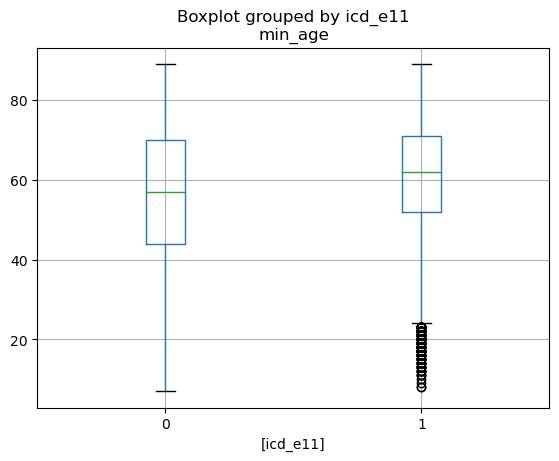

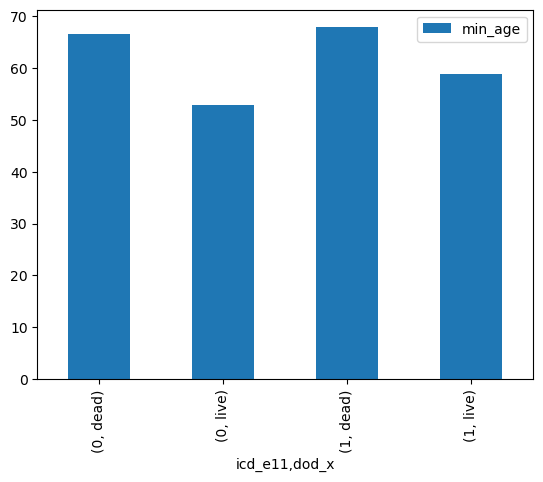

In [43]:
e11[['icd_e11','min_age']].boxplot(by='icd_e11')

e11.groupby(['icd_e11','dod_x'])['min_age'].mean().to_frame().plot(kind='bar')

In [32]:
e11.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 115012 entries, 0 to 115011
Data columns (total 5 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   subject_id  115012 non-null  int64 
 1   dod         115012 non-null  object
 2   min_age     115012 non-null  int64 
 3   icd_e11     115012 non-null  int64 
 4   race        115012 non-null  object
dtypes: int64(3), object(2)
memory usage: 4.4+ MB


<Axes: xlabel='icd_e11,dod_x'>

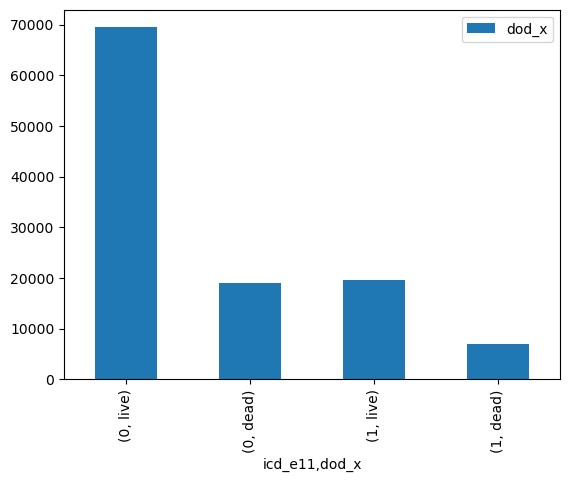

In [40]:
e11['dod_x'] = np.where(e11['dod'] == '0', 'live', 'dead')
e11.groupby('icd_e11')['dod_x'].value_counts().to_frame().plot(kind='bar')

<Axes: xlabel='icd_e11', ylabel='min_age'>

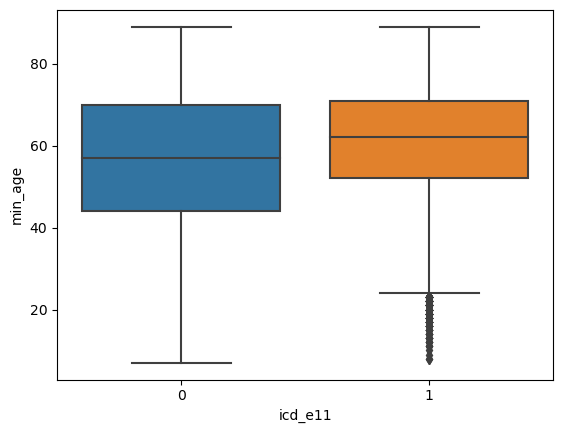

In [54]:
# e11.groupby(['icd_e11','dod_x'])['min_age'].plot(kind='box')
sns.boxplot(data = e11, x = "icd_e11", y = "min_age")

<Axes: xlabel='dod_x', ylabel='min_age'>

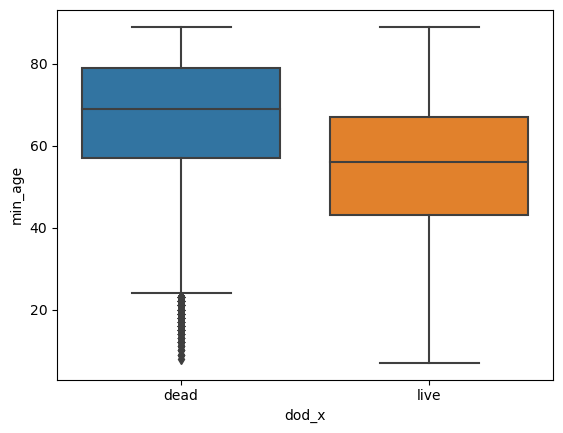

In [56]:
sns.boxplot(data = e11, x = "dod_x", y = "min_age")

subject_id	hadm_id	admittime	dischtime	deathtime	admission_type	admit_provider_id	admission_location	discharge_location	insurance	language	marital_status	race	edregtime	edouttime	hospital_expire_flag

In [47]:
# query="""
# SELECT p.subject_id, p.dod, p.min_age, ic.icd_E11, a.race
# FROM patients as p
# INNER JOIN admission as a
# on a.subject_id = p.subject_id
# INNER JOIN ictarget as ic
# ON p.subject_id = ic.subject_id
# GROUP BY p.subject_id


# """
query="""

SELECT a.subject_id, a.hadm_id, a.dischtime, a.admittime
FROM admission as a

"""

# SELECT cust_name, opening_amt, 
# receive_amt, (opening_amt + receive_amt)
# FROM customer
# WHERE (opening_amt + receive_amt)>15000;


# GROUP BY icd_E11
with sqlite3.connect('../data/ehr.sqlite') as db: 
    los = pd.read_sql(query, db)
los

,subject_id,hadm_id,dischtime,admittime
0,10000032,22595853,2180-05-07 17:15:00,2180-05-06 22:23:00
1,10000032,22841357,2180-06-27 18:49:00,2180-06-26 18:27:00
2,10000032,25742920,2180-08-07 17:50:00,2180-08-05 23:44:00
3,10000032,29079034,2180-07-25 17:55:00,2180-07-23 12:35:00
4,10000068,25022803,2160-03-04 06:26:00,2160-03-03 23:16:00
...,...,...,...,...
431226,19999828,25744818,2149-01-18 17:00:00,2149-01-08 16:44:00
431227,19999828,29734428,2147-08-04 18:10:00,2147-07-18 16:23:00
431228,19999840,21033226,2164-09-17 13:42:00,2164-09-10 13:47:00
431229,19999840,26071774,2164-07-28 12:15:00,2164-07-25 00:27:00


In [37]:
los[["dischtime", "admittime"]] = los[["dischtime", "admittime"]].apply(pd.to_datetime)
los.info()

los['length_of_stay(hours)'] = round((((los['dischtime'] - los['admittime'])).dt.total_seconds() / 3600), 2)
# los['length_of_stay(days)'] = ((los['dischtime'] - los['admittime'])).astype('<m8[m]').astype(int)
                         
los

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 431231 entries, 0 to 431230
Data columns (total 5 columns):
 #   Column                 Non-Null Count   Dtype         
---  ------                 --------------   -----         
 0   subject_id             431231 non-null  int64         
 1   hadm_id                431231 non-null  int64         
 2   dischtime              431231 non-null  datetime64[ns]
 3   admittime              431231 non-null  datetime64[ns]
 4   length_of_stay(hours)  431231 non-null  float64       
dtypes: datetime64[ns](2), float64(1), int64(2)
memory usage: 16.5 MB


,subject_id,hadm_id,dischtime,admittime,length_of_stay(hours)
0,10000032,22595853,2180-05-07 17:15:00,2180-05-06 22:23:00,18.87
1,10000032,22841357,2180-06-27 18:49:00,2180-06-26 18:27:00,24.37
2,10000032,25742920,2180-08-07 17:50:00,2180-08-05 23:44:00,42.10
3,10000032,29079034,2180-07-25 17:55:00,2180-07-23 12:35:00,53.33
4,10000068,25022803,2160-03-04 06:26:00,2160-03-03 23:16:00,7.17
...,...,...,...,...,...
431226,19999828,25744818,2149-01-18 17:00:00,2149-01-08 16:44:00,240.27
431227,19999828,29734428,2147-08-04 18:10:00,2147-07-18 16:23:00,409.78
431228,19999840,21033226,2164-09-17 13:42:00,2164-09-10 13:47:00,167.92
431229,19999840,26071774,2164-07-28 12:15:00,2164-07-25 00:27:00,83.80


In [69]:
query="""

SELECT a.subject_id, a.hadm_id, a.dischtime, a.admittime, a.race, ic.icd_E11, ic.icd_E78, ic.icd_E87, ic.icd_F32,
ic.icd_I16, ic.icd_I50, ic.icd_N17, ic.icd_Y92, ic.icd_Z85
FROM admission as a
INNER JOIN ictarget as ic
ON a.subject_id = ic.subject_id
    AND a.hadm_id = ic.hadm_id

"""
# INNER JOIN patient as p
# ON p.subject_id = ic.subject_id
# p.dod, p.min_age, 
# INNER JOIN ictarget as ic
# ON a.subject_id = ic.subject_id
# AND a.hadm_id = ic.hadm_id
#  p.dod, p.min_age,
# ic.icd_E78, ic.icd_E87, ic.icd_F32,
# ic.icd_I16, ic.icd_I50, ic.icd_N17, ic.icd_Y92, ic.icd_Z85, 
# INNER JOIN patient as p
# on a.subject_id = p.subject_id
# GROUP BY p.subject_id
# GROUP BY icd_E11

with sqlite3.connect('../data/ehr.sqlite') as db: 
    mer = pd.read_sql(query, db)
mer


,subject_id,hadm_id,dischtime,admittime,race,icd_e11,icd_e78,icd_e87,icd_f32,icd_i16,icd_i50,icd_n17,icd_y92,icd_z85
0,10000032,22841357,2180-06-27 18:49:00,2180-06-26 18:27:00,WHITE,0,0,1,0,0,0,0,0,0
1,10000032,25742920,2180-08-07 17:50:00,2180-08-05 23:44:00,WHITE,0,0,1,0,0,0,0,0,0
2,10000032,29079034,2180-07-25 17:55:00,2180-07-23 12:35:00,WHITE,0,0,1,0,0,0,0,0,0
3,10000084,23052089,2160-11-25 14:52:00,2160-11-21 01:56:00,WHITE,0,1,0,0,0,0,0,0,1
4,10000117,27988844,2183-09-21 16:30:00,2183-09-18 18:10:00,WHITE,0,1,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
263936,19999828,25744818,2149-01-18 17:00:00,2149-01-08 16:44:00,WHITE,1,0,1,0,0,0,0,1,0
263937,19999828,29734428,2147-08-04 18:10:00,2147-07-18 16:23:00,WHITE,1,0,0,0,0,0,0,1,0
263938,19999840,21033226,2164-09-17 13:42:00,2164-09-10 13:47:00,WHITE,0,1,0,0,1,0,0,0,0
263939,19999840,26071774,2164-07-28 12:15:00,2164-07-25 00:27:00,WHITE,0,1,0,0,1,0,0,0,0


In [251]:
pts.head()

,unnamed:_0,subject_id,gender,anchor_age,anchor_year,anchor_year_group,dod,min_year_group,max_year_group,min_age,base_anchor_year,dod_x
0,0,10000032,F,52,2180,2014 - 2016,2180-09-09 00:00:00,2014,2016,44,2174,dead
1,1,10000048,F,23,2126,2008 - 2010,0,2008,2010,21,2126,live
2,2,10000068,F,19,2160,2008 - 2010,0,2008,2010,17,2160,live
3,3,10000084,M,72,2160,2017 - 2019,2161-02-13 00:00:00,2017,2019,61,2151,dead
4,4,10000102,F,27,2136,2008 - 2010,0,2008,2010,25,2136,live


In [71]:
mer[["dischtime", "admittime"]] = mer[["dischtime", "admittime"]].apply(pd.to_datetime)
mer['length_of_stay(hours)'] = round((((mer['dischtime'] - mer['admittime'])).dt.total_seconds() / 3600), 2)
mer.drop(columns=["dischtime", "admittime"], axis=1)

,subject_id,hadm_id,race,icd_e11,icd_e78,icd_e87,icd_f32,icd_i16,icd_i50,icd_n17,icd_y92,icd_z85,length_of_stay(hours)
0,10000032,22841357,WHITE,0,0,1,0,0,0,0,0,0,24.37
1,10000032,25742920,WHITE,0,0,1,0,0,0,0,0,0,42.10
2,10000032,29079034,WHITE,0,0,1,0,0,0,0,0,0,53.33
3,10000084,23052089,WHITE,0,1,0,0,0,0,0,0,1,108.93
4,10000117,27988844,WHITE,0,1,0,0,0,0,0,1,0,70.33
...,...,...,...,...,...,...,...,...,...,...,...,...,...
263936,19999828,25744818,WHITE,1,0,1,0,0,0,0,1,0,240.27
263937,19999828,29734428,WHITE,1,0,0,0,0,0,0,1,0,409.78
263938,19999840,21033226,WHITE,0,1,0,0,1,0,0,0,0,167.92
263939,19999840,26071774,WHITE,0,1,0,0,1,0,0,0,0,83.80


In [246]:
mer.columns

Index(['subject_id', 'hadm_id', 'dischtime', 'admittime', 'race', 'icd_e11',
       'icd_e78', 'icd_e87', 'icd_f32', 'icd_i16', 'icd_i50', 'icd_n17',
       'icd_y92', 'icd_z85', 'length_of_stay(hours)'],
      dtype='object')

In [269]:
mer2 = mer.groupby('subject_id')[['icd_e11',
       'icd_e78', 'icd_e87', 'icd_f32', 'icd_i16', 'icd_i50', 'icd_n17',
       'icd_y92', 'icd_z85', 'length_of_stay(hours)']].agg('sum')
mer2.head(3)

,icd_e11,icd_e78,icd_e87,icd_f32,icd_i16,icd_i50,icd_n17,icd_y92,icd_z85,length_of_stay(hours)
subject_id,,,,,,,,,,
10000032,0,0,3,0,0,0,0,0,0,119.80
10000084,0,1,0,0,0,0,0,0,1,108.93
10000117,0,1,0,0,0,0,0,1,0,70.33


In [274]:
mer2.merge(mer[['subject_id', 'race']], how='left', on=['subject_id']).drop_duplicates()

,subject_id,icd_e11,icd_e78,icd_e87,icd_f32,icd_i16,icd_i50,icd_n17,icd_y92,icd_z85,length_of_stay(hours),race
0,10000032,0,0,3,0,0,0,0,0,0,119.80,WHITE
3,10000084,0,1,0,0,0,0,0,0,1,108.93,WHITE
4,10000117,0,1,0,0,0,0,0,1,0,70.33,WHITE
5,10000248,0,0,0,0,0,0,0,1,0,17.92,WHITE
6,10000764,0,1,0,0,1,0,1,1,0,112.98,WHITE
...,...,...,...,...,...,...,...,...,...,...,...,...
263921,19999625,0,0,2,0,0,0,2,0,1,200.88,WHITE
263923,19999784,0,0,8,0,0,0,0,7,0,1984.16,BLACK/AFRICAN AMERICAN
263936,19999828,2,0,1,0,0,0,0,2,0,650.05,WHITE
263938,19999840,0,2,0,0,2,0,0,0,0,251.72,WHITE


In [430]:
pt_mer3 = (((mer.groupby('subject_id')[['icd_e11',
       'icd_e78', 'icd_e87', 'icd_f32', 'icd_i16', 'icd_i50', 'icd_n17',
       'icd_y92', 'icd_z85', 'length_of_stay(hours)']].agg('sum'))
 .merge(mer[['subject_id','race']], how='inner', on=['subject_id'])
).merge(pts[['subject_id','gender','min_age', 'dod_x']], on=['subject_id'], how='inner')).drop_duplicates()

In [431]:
pt_mer3.head()

,subject_id,icd_e11,icd_e78,icd_e87,icd_f32,icd_i16,icd_i50,icd_n17,icd_y92,icd_z85,length_of_stay(hours),race,gender,min_age,dod_x
0,10000032,0,0,3,0,0,0,0,0,0,119.80,WHITE,F,44,dead
3,10000084,0,1,0,0,0,0,0,0,1,108.93,WHITE,M,61,dead
4,10000117,0,1,0,0,0,0,0,1,0,70.33,WHITE,F,46,live
5,10000248,0,0,0,0,0,0,0,1,0,17.92,WHITE,M,26,live
6,10000764,0,1,0,0,1,0,1,1,0,112.98,WHITE,M,78,live


In [432]:
# sns.scatterplot(data=pt_mer3, x="min_age", y="length_of_stay(hours)", size="icd_f32", hue='race', legend=False, sizes=(.20, 50))


In [351]:
pt_mer2.shape #(120159, 14)
pt_mer2.head()


# pt_mer2['icd_e11'] = pt_mer2['icd_e11'].astype(int)
# pt_mer2['icd_e11'].describe()


# data["Number"]= data["Number"].astype(str)
# pt_mer2.info()

count    120159.000000
mean          0.800298
std           2.308517
min           0.000000
25%           0.000000
50%           0.000000
75%           1.000000
max          75.000000
Name: icd_e11, dtype: float64

In [434]:
# def replacing(x):
#     if x > 0:
#         return 'Positive'
#     else:
#         return 'Negative'

# pt_mer2['icd_e11'] = pt_mer2['icd_e11'].apply(replacing)
# pt_mer2['icd_e78'] = pt_mer2['icd_e78'].apply(replacing)
# pt_mer2['icd_e87'] = pt_mer2['icd_e87'].apply(replacing)
# pt_mer2['icd_f32'] = pt_mer2['icd_f32'].apply(replacing)
# pt_mer2['icd_i16'] = pt_mer2['icd_i16'].apply(replacing)
# pt_mer2['icd_i50'] = pt_mer2['icd_i50'].apply(replacing)
# pt_mer2['icd_n17'] = pt_mer2['icd_n17'].apply(replacing)
# pt_mer2['icd_y92'] = pt_mer2['icd_y92'].apply(replacing)
# pt_mer2['icd_z85'] = pt_mer2['icd_z85'].apply(replacing)


# def replacing_str(x):
#     if x == 'F':
#         return 'Female'
#     else:
#         return 'Male'
# pt_mer3['gender'] = pt_mer3['gender'].apply(replacing_str)

In [436]:
pt_mer3.head()

,subject_id,icd_e11,icd_e78,icd_e87,icd_f32,icd_i16,icd_i50,icd_n17,icd_y92,icd_z85,length_of_stay(hours),race,gender,min_age,dod_x
0,10000032,0,0,3,0,0,0,0,0,0,119.80,WHITE,Female,44,dead
3,10000084,0,1,0,0,0,0,0,0,1,108.93,WHITE,Male,61,dead
4,10000117,0,1,0,0,0,0,0,1,0,70.33,WHITE,Female,46,live
5,10000248,0,0,0,0,0,0,0,1,0,17.92,WHITE,Male,26,live
6,10000764,0,1,0,0,1,0,1,1,0,112.98,WHITE,Male,78,live


In [426]:
df = pt_mer2.loc[pt_mer2['race']=='BLACK/AFRICAN AMERICAN']
df


,subject_id,icd_e11,icd_e78,icd_e87,icd_f32,icd_i16,icd_i50,icd_n17,icd_y92,icd_z85,length_of_stay(hours),race,gender,min_age,dod_x
10,10000935,Negative,Positive,Positive,Positive,Negative,Negative,Negative,Negative,Positive,665.49,BLACK/AFRICAN AMERICAN,Male,50,dead
14,10000980,Positive,Positive,Positive,Negative,Negative,Positive,Positive,Positive,Negative,578.24,BLACK/AFRICAN AMERICAN,Male,71,dead
39,10001884,Negative,Positive,Positive,Negative,Positive,Negative,Positive,Positive,Negative,1003.46,BLACK/AFRICAN AMERICAN,Male,66,dead
95,10002769,Negative,Positive,Negative,Negative,Positive,Negative,Negative,Negative,Negative,190.75,BLACK/AFRICAN AMERICAN,Male,56,live
101,10002930,Negative,Negative,Positive,Positive,Negative,Negative,Negative,Negative,Negative,216.72,BLACK/AFRICAN AMERICAN,Male,43,dead
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
263840,19996968,Negative,Negative,Negative,Negative,Positive,Negative,Negative,Negative,Negative,155.37,BLACK/AFRICAN AMERICAN,Male,27,live
263876,19998330,Positive,Positive,Positive,Negative,Negative,Positive,Positive,Negative,Negative,589.91,BLACK/AFRICAN AMERICAN,Male,66,dead
263882,19998350,Positive,Positive,Negative,Positive,Positive,Negative,Negative,Negative,Negative,52.40,BLACK/AFRICAN AMERICAN,Male,47,live
263913,19999287,Positive,Positive,Negative,Negative,Positive,Negative,Negative,Negative,Negative,485.17,BLACK/AFRICAN AMERICAN,Male,69,dead


In [445]:
pt_mer2 = pt_mer2.merge(pt_mer3[['subject_id', 'gender']], how='left', on=['subject_id']).drop('gender_x', axis=1).rename(columns={'gender_y':'gender'})

Text(0, 0.5, 'Age(Years)')

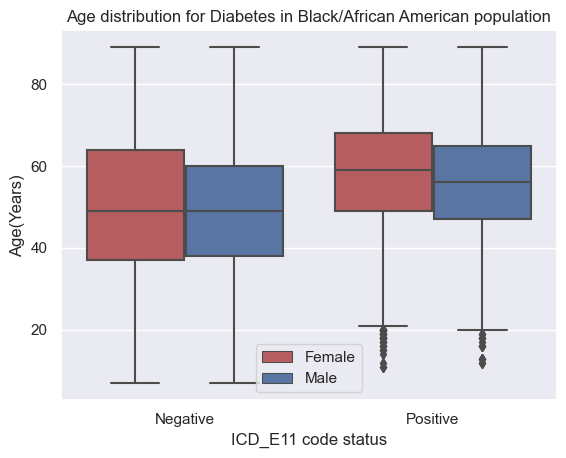

In [449]:
# df = pt_mer2.loc[pt_mer2['race']=='WHITE']
# df = pt_mer2.loc[pt_mer2['race']=='WHITE']
df = pt_mer2.loc[pt_mer2['race']=='BLACK/AFRICAN AMERICAN']

my_col = {gender: "b" if gender == "Male" else "r" for gender in df.gender.unique()}

sns.boxplot(data=df, hue="gender", y="min_age", x="icd_e11", palette=my_col)

# .set(title = 'Genderwise distribution of age among live and dead population',
#                                                                    xlabel='GENDER (F:Female; M:Male)', ylabel='AGE(years)'))
plt.legend(loc='lower center')
plt.title('Age distribution for Diabetes in Black/African American population')
plt.xlabel('ICD_E11 code status')
plt.ylabel('Age(Years)')

Text(0, 0.5, 'Age(Years)')

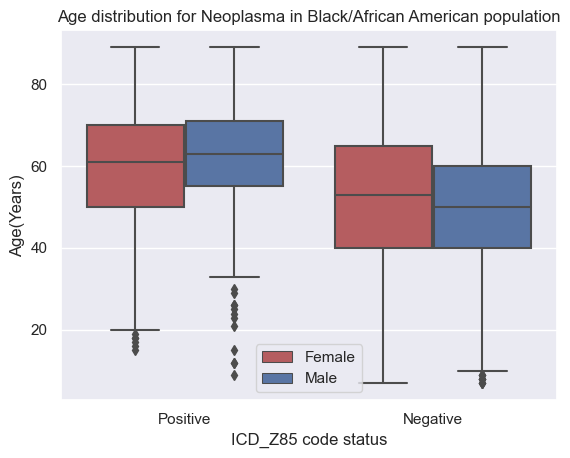

In [451]:
# df = pt_mer2.loc[pt_mer2['race']=='WHITE']
# df = pt_mer2.loc[pt_mer2['race']=='WHITE']
df = pt_mer2.loc[pt_mer2['race']=='BLACK/AFRICAN AMERICAN']

my_col = {gender: "b" if gender == "Male" else "r" for gender in df.gender.unique()}

sns.boxplot(data=df, hue="gender", y="min_age", x="icd_z85", palette=my_col)

# .set(title = 'Genderwise distribution of age among live and dead population',
#                                                                    xlabel='GENDER (F:Female; M:Male)', ylabel='AGE(years)'))
plt.legend(loc='lower center')
plt.title('Age distribution for Neoplasma in Black/African American population')
plt.xlabel('ICD_Z85 code status')
plt.ylabel('Age(Years)')

In [459]:
pt_mer2['race'].value_counts()

WHITE                                        81070
BLACK/AFRICAN AMERICAN                       11932
UNKNOWN                                       7896
OTHER                                         6797
WHITE - OTHER EUROPEAN                        3173
HISPANIC OR LATINO                            2309
HISPANIC/LATINO - PUERTO RICAN                2148
WHITE - RUSSIAN                               1895
ASIAN                                         1802
ASIAN - CHINESE                               1617
BLACK/CAPE VERDEAN                            1142
HISPANIC/LATINO - DOMINICAN                   1131
UNABLE TO OBTAIN                              1122
PATIENT DECLINED TO ANSWER                    1084
BLACK/CARIBBEAN ISLAND                         842
BLACK/AFRICAN                                  710
PORTUGUESE                                     487
ASIAN - SOUTH EAST ASIAN                       440
WHITE - EASTERN EUROPEAN                       433
HISPANIC/LATINO - GUATEMALAN   

In [ ]:
['WHITE','BLACK/AFRICAN AMERICAN', 'WHITE - OTHER EUROPEAN', 'HISPANIC OR LATINO','AMERICAN INDIAN/ALASKA NATIVE','ASIAN', 'ASIAN - ASIAN INDIAN']

In [461]:
df_ra

0          True
1          True
2          True
3          True
4          True
          ...  
130886     True
130887     True
130888     True
130889     True
130890    False
Name: race, Length: 130891, dtype: bool

# Gender Race 

Text(0, 0.5, 'RACE')

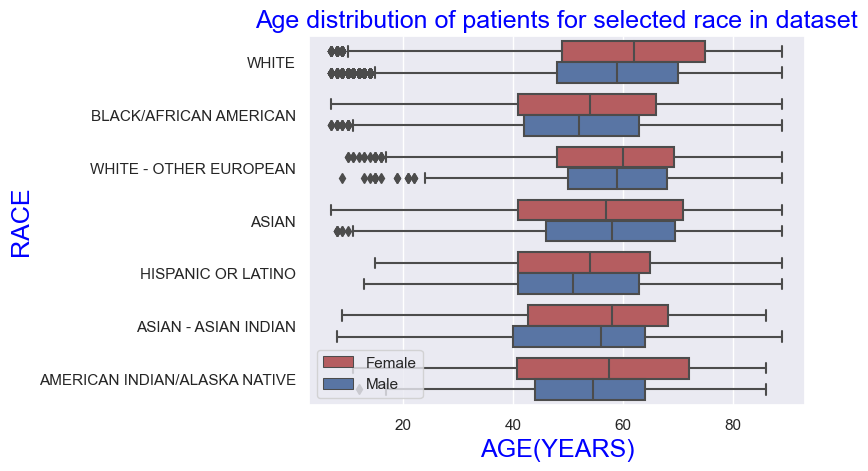

In [474]:
df_ra =pt_mer2[(pt_mer2['race'].isin(['WHITE','BLACK/AFRICAN AMERICAN', 'WHITE - OTHER EUROPEAN', 'HISPANIC OR LATINO','AMERICAN INDIAN/ALASKA NATIVE','ASIAN', 'ASIAN - ASIAN INDIAN']))]

# df = df_ra.loc[df_ra['icd_i16']=='Positive']

my_col = {gender: "b" if gender == "Male" else "r" for gender in df.gender.unique()}

sns.boxplot(data=df_ra, hue="gender", x="min_age", y="race", palette=my_col)


plt.legend(loc='lower left')
plt.title('Age distribution of patients for selected races in dataset', fontsize = 18
           , color='blue' )
plt.xlabel('AGE(YEARS)', fontsize = 18
           , color='blue')
plt.ylabel('RACE', fontsize = 18
           , color='blue')

Text(0, 0.5, 'RACE')

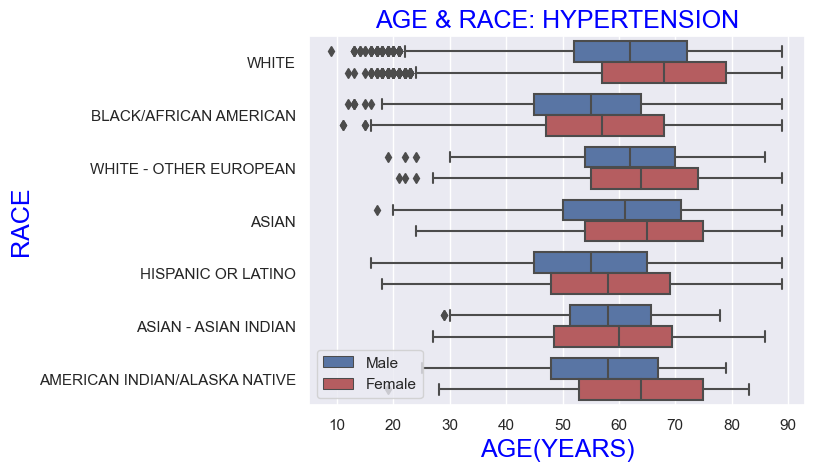

In [478]:
#  df = pt_mer2.loc[pt_mer2['race']=='WHITE']
# df = pt_mer2.loc[pt_mer2['race']=='WHITE']
# df = pt_mer2.loc[pt_mer2['race']=='BLACK/AFRICAN AMERICAN']

# ['WHITE','BLACK/AFRICAN AMERICAN', 'WHITE - OTHER EUROPEAN', 'HISPANIC OR LATINO','AMERICAN INDIAN/ALASKA NATIVE','ASIAN', 'ASIAN - ASIAN INDIAN']

df_ra =pt_mer2[(pt_mer2['race'].isin(['WHITE','BLACK/AFRICAN AMERICAN', 'WHITE - OTHER EUROPEAN', 'HISPANIC OR LATINO','AMERICAN INDIAN/ALASKA NATIVE','ASIAN', 'ASIAN - ASIAN INDIAN']))]

df = df_ra.loc[df_ra['icd_i16']=='Positive']

my_col = {gender: "b" if gender == "Male" else "r" for gender in df.gender.unique()}

sns.boxplot(data=df, hue="gender", x="min_age", y="race", palette=my_col)


plt.legend(loc='lower left')
plt.title('AGE & RACE: HYPERTENSION', fontsize = 18
           , color='blue' )
plt.xlabel('AGE(YEARS)', fontsize = 18
           , color='blue')
plt.ylabel('RACE', fontsize = 18
           , color='blue')

Text(0, 0.5, 'RACE')

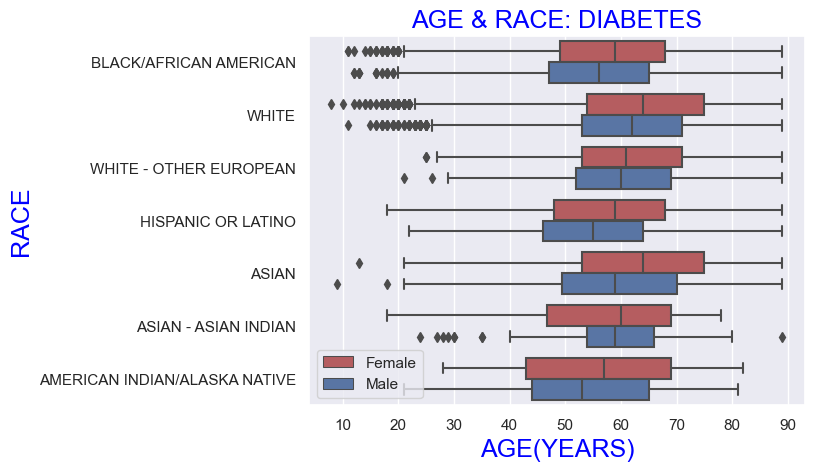

In [484]:
#  df = pt_mer2.loc[pt_mer2['race']=='WHITE']
# df = pt_mer2.loc[pt_mer2['race']=='WHITE']
# df = pt_mer2.loc[pt_mer2['race']=='BLACK/AFRICAN AMERICAN']

# ['WHITE','BLACK/AFRICAN AMERICAN', 'WHITE - OTHER EUROPEAN', 'HISPANIC OR LATINO','AMERICAN INDIAN/ALASKA NATIVE','ASIAN', 'ASIAN - ASIAN INDIAN']

df_ra =pt_mer2[(pt_mer2['race'].isin(['WHITE','BLACK/AFRICAN AMERICAN', 'WHITE - OTHER EUROPEAN', 'HISPANIC OR LATINO','AMERICAN INDIAN/ALASKA NATIVE','ASIAN', 'ASIAN - ASIAN INDIAN']))]

df = df_ra.loc[df_ra['icd_e11']=='Positive']

my_col = {gender: "b" if gender == "Male" else "r" for gender in df.gender.unique()}

sns.boxplot(data=df, hue="gender", x="min_age", y="race", palette=my_col)


plt.legend(loc='lower left')
plt.title('AGE & RACE: DIABETES', fontsize = 18
           , color='blue' )
plt.xlabel('AGE(YEARS)', fontsize = 18
           , color='blue')
plt.ylabel('RACE', fontsize = 18
           , color='blue')

Text(0, 0.5, 'RACE')

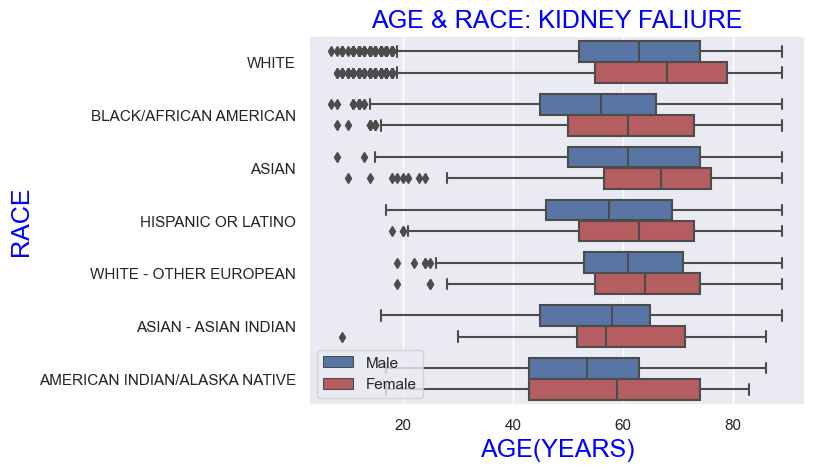

In [480]:
#  df = pt_mer2.loc[pt_mer2['race']=='WHITE']
# df = pt_mer2.loc[pt_mer2['race']=='WHITE']
# df = pt_mer2.loc[pt_mer2['race']=='BLACK/AFRICAN AMERICAN']

# ['WHITE','BLACK/AFRICAN AMERICAN', 'WHITE - OTHER EUROPEAN', 'HISPANIC OR LATINO','AMERICAN INDIAN/ALASKA NATIVE','ASIAN', 'ASIAN - ASIAN INDIAN']

df_ra =pt_mer2[(pt_mer2['race'].isin(['WHITE','BLACK/AFRICAN AMERICAN', 'WHITE - OTHER EUROPEAN', 'HISPANIC OR LATINO','AMERICAN INDIAN/ALASKA NATIVE','ASIAN', 'ASIAN - ASIAN INDIAN']))]

df = df_ra.loc[df_ra['icd_n17']=='Positive']

my_col = {gender: "b" if gender == "Male" else "r" for gender in df.gender.unique()}

sns.boxplot(data=df, hue="gender", x="min_age", y="race", palette=my_col)


plt.legend(loc='lower left')
plt.title('AGE & RACE: KIDNEY FAILURE', fontsize = 18
           , color='blue' )
plt.xlabel('AGE(YEARS)', fontsize = 18
           , color='blue')
plt.ylabel('RACE', fontsize = 18
           , color='blue')

Text(0, 0.5, 'RACE')

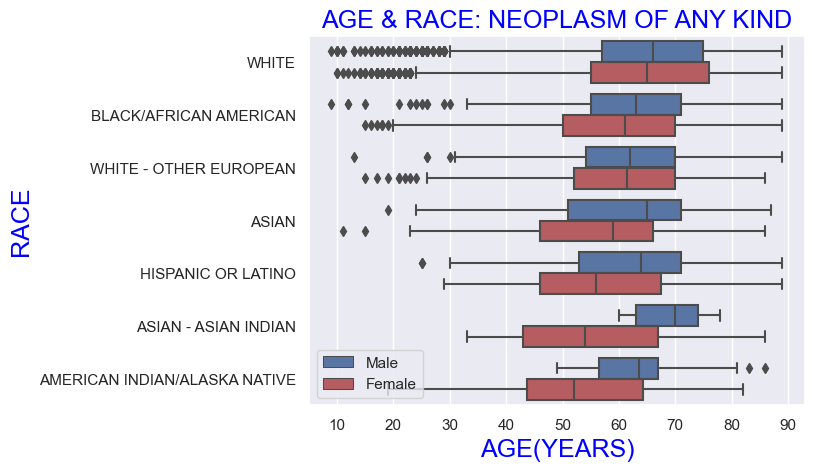

In [482]:
#  df = pt_mer2.loc[pt_mer2['race']=='WHITE']
# df = pt_mer2.loc[pt_mer2['race']=='WHITE']
# df = pt_mer2.loc[pt_mer2['race']=='BLACK/AFRICAN AMERICAN']

# ['WHITE','BLACK/AFRICAN AMERICAN', 'WHITE - OTHER EUROPEAN', 'HISPANIC OR LATINO','AMERICAN INDIAN/ALASKA NATIVE','ASIAN', 'ASIAN - ASIAN INDIAN']

df_ra =pt_mer2[(pt_mer2['race'].isin(['WHITE','BLACK/AFRICAN AMERICAN', 'WHITE - OTHER EUROPEAN', 'HISPANIC OR LATINO','AMERICAN INDIAN/ALASKA NATIVE','ASIAN', 'ASIAN - ASIAN INDIAN']))]

df = df_ra.loc[df_ra['icd_z85']=='Positive']

my_col = {gender: "b" if gender == "Male" else "r" for gender in df.gender.unique()}

sns.boxplot(data=df, hue="gender", x="min_age", y="race", palette=my_col)


plt.legend(loc='lower left')
plt.title('AGE & RACE: NEOPLASM OF ANY KIND', fontsize = 18
           , color='blue' )
plt.xlabel('AGE(YEARS)', fontsize = 18
           , color='blue')
plt.ylabel('RACE', fontsize = 18
           , color='blue')

Text(0, 0.5, 'RACE')

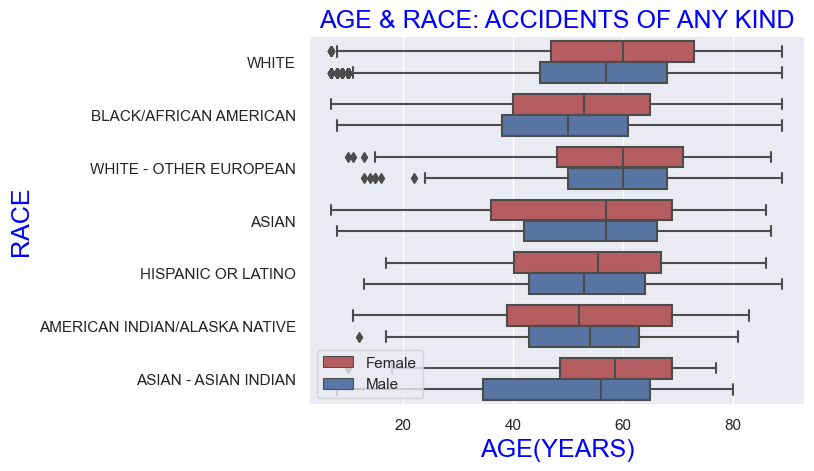

In [483]:
#  df = pt_mer2.loc[pt_mer2['race']=='WHITE']
# df = pt_mer2.loc[pt_mer2['race']=='WHITE']
# df = pt_mer2.loc[pt_mer2['race']=='BLACK/AFRICAN AMERICAN']

# ['WHITE','BLACK/AFRICAN AMERICAN', 'WHITE - OTHER EUROPEAN', 'HISPANIC OR LATINO','AMERICAN INDIAN/ALASKA NATIVE','ASIAN', 'ASIAN - ASIAN INDIAN']

df_ra =pt_mer2[(pt_mer2['race'].isin(['WHITE','BLACK/AFRICAN AMERICAN', 'WHITE - OTHER EUROPEAN', 'HISPANIC OR LATINO','AMERICAN INDIAN/ALASKA NATIVE','ASIAN', 'ASIAN - ASIAN INDIAN']))]

df = df_ra.loc[df_ra['icd_y92']=='Positive']

my_col = {gender: "b" if gender == "Male" else "r" for gender in df.gender.unique()}

sns.boxplot(data=df, hue="gender", x="min_age", y="race", palette=my_col)


plt.legend(loc='lower left')
plt.title('AGE & RACE: ACCIDENTS OF ANY KIND', fontsize = 18
           , color='blue' )
plt.xlabel('AGE(YEARS)', fontsize = 18
           , color='blue')
plt.ylabel('RACE', fontsize = 18
           , color='blue')

Text(0, 0.5, 'RACE')

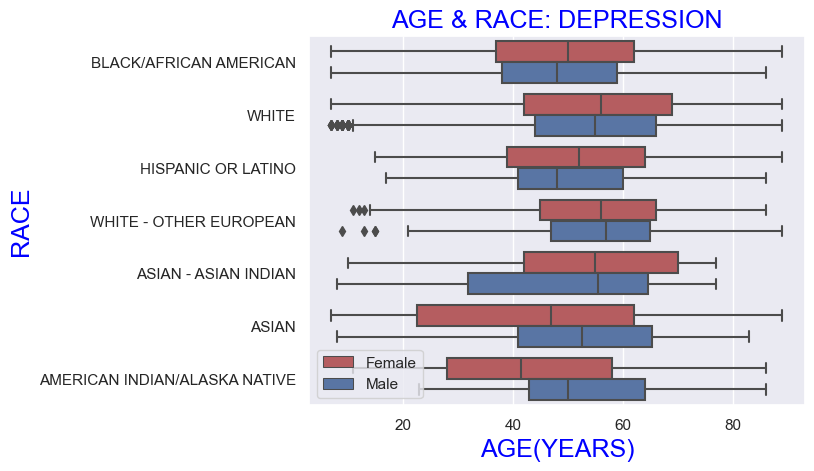

In [486]:
#  df = pt_mer2.loc[pt_mer2['race']=='WHITE']
# df = pt_mer2.loc[pt_mer2['race']=='WHITE']
# df = pt_mer2.loc[pt_mer2['race']=='BLACK/AFRICAN AMERICAN']

# ['WHITE','BLACK/AFRICAN AMERICAN', 'WHITE - OTHER EUROPEAN', 'HISPANIC OR LATINO','AMERICAN INDIAN/ALASKA NATIVE','ASIAN', 'ASIAN - ASIAN INDIAN']

df_ra =pt_mer2[(pt_mer2['race'].isin(['WHITE','BLACK/AFRICAN AMERICAN', 'WHITE - OTHER EUROPEAN', 'HISPANIC OR LATINO','AMERICAN INDIAN/ALASKA NATIVE','ASIAN', 'ASIAN - ASIAN INDIAN']))]

df = df_ra.loc[df_ra['icd_f32']=='Positive']

my_col = {gender: "b" if gender == "Male" else "r" for gender in df.gender.unique()}

sns.boxplot(data=df, hue="gender", x="min_age", y="race", palette=my_col)


plt.legend(loc='lower left')
plt.title('AGE & RACE: DEPRESSION', fontsize = 18
           , color='blue' )
plt.xlabel('AGE(YEARS)', fontsize = 18
           , color='blue')
plt.ylabel('RACE', fontsize = 18
           , color='blue')

Text(0, 0.5, 'RACE')

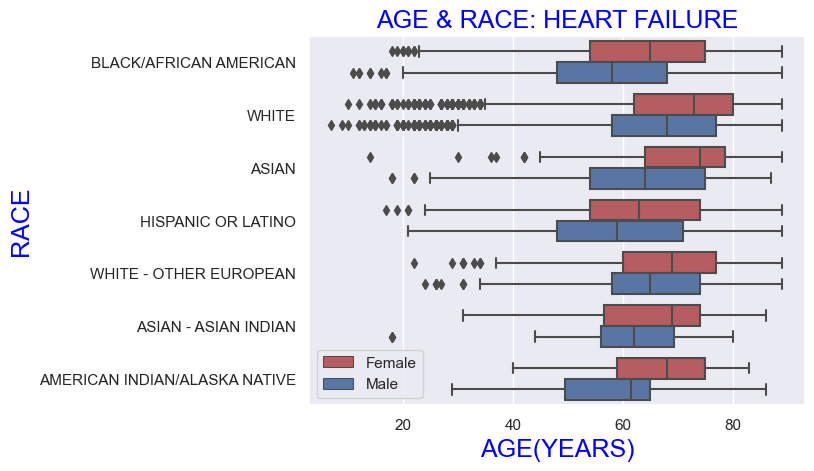

In [481]:
#  df = pt_mer2.loc[pt_mer2['race']=='WHITE']
# df = pt_mer2.loc[pt_mer2['race']=='WHITE']
# df = pt_mer2.loc[pt_mer2['race']=='BLACK/AFRICAN AMERICAN']

# ['WHITE','BLACK/AFRICAN AMERICAN', 'WHITE - OTHER EUROPEAN', 'HISPANIC OR LATINO','AMERICAN INDIAN/ALASKA NATIVE','ASIAN', 'ASIAN - ASIAN INDIAN']

df_ra =pt_mer2[(pt_mer2['race'].isin(['WHITE','BLACK/AFRICAN AMERICAN', 'WHITE - OTHER EUROPEAN', 'HISPANIC OR LATINO','AMERICAN INDIAN/ALASKA NATIVE','ASIAN', 'ASIAN - ASIAN INDIAN']))]

df = df_ra.loc[df_ra['icd_i50']=='Positive']

my_col = {gender: "b" if gender == "Male" else "r" for gender in df.gender.unique()}

sns.boxplot(data=df, hue="gender", x="min_age", y="race", palette=my_col)


plt.legend(loc='lower left')
plt.title('AGE & RACE: HEART FAILURE', fontsize = 18
           , color='blue' )
plt.xlabel('AGE(YEARS)', fontsize = 18
           , color='blue')
plt.ylabel('RACE', fontsize = 18
           , color='blue')

# LIVE DEAD RACE

Text(0, 0.5, 'Age(Years)')

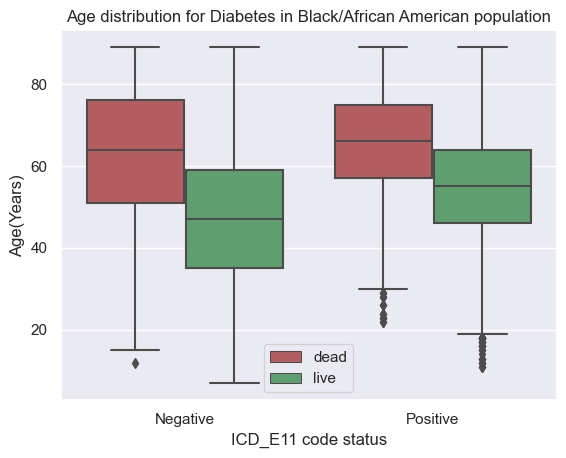

In [439]:
# df = pt_mer2.loc[pt_mer2['race']=='WHITE']
# df = pt_mer2.loc[pt_mer2['race']=='WHITE']
df = pt_mer2.loc[pt_mer2['race']=='BLACK/AFRICAN AMERICAN']

my_pal = {dod_x: "r" if dod_x == "dead" else "g" for dod_x in df.dod_x.unique()}

sns.boxplot(data=df, hue="dod_x", y="min_age", x="icd_e11", palette=my_pal)
# 
# sns.boxplot(data=df, hue="gender", y="min_age", x="icd_e11", palette=my_pal)


# .set(title = 'Genderwise distribution of age among live and dead population',
#                                                                    xlabel='GENDER (F:Female; M:Male)', ylabel='AGE(years)'))
plt.legend(loc='lower center')
plt.title('Age distribution for Diabetes in Black/African American population')
plt.xlabel('ICD_E11 code status')
plt.ylabel('Age(Years)')

Text(0, 0.5, 'RACE')

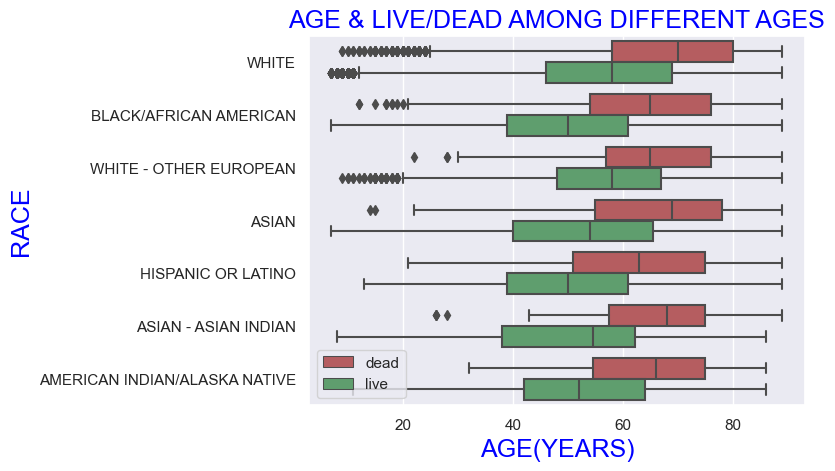

In [493]:
df_ra =pt_mer2[(pt_mer2['race'].isin(['WHITE','BLACK/AFRICAN AMERICAN', 'WHITE - OTHER EUROPEAN', 'HISPANIC OR LATINO','AMERICAN INDIAN/ALASKA NATIVE','ASIAN', 'ASIAN - ASIAN INDIAN']))]

# df = pt_mer2.loc[pt_mer2['race']=='WHITE']
# df = pt_mer2.loc[pt_mer2['race']=='WHITE']
# df = pt_mer2.loc[pt_mer2['race']=='BLACK/AFRICAN AMERICAN']

my_pal = {dod_x: "r" if dod_x == "dead" else "g" for dod_x in df.dod_x.unique()}

sns.boxplot(data=df_ra, hue="dod_x", x="min_age", y="race", palette=my_pal)
# 
# sns.boxplot(data=df, hue="gender", y="min_age", x="icd_e11", palette=my_pal)


# .set(title = 'Genderwise distribution of age among live and dead population',
#                                                                    xlabel='GENDER (F:Female; M:Male)', ylabel='AGE(years)'))
plt.legend(loc='lower left')
plt.title('AGE & LIVE/DEAD AMONG DIFFERENT AGES', fontsize=18, color='blue')
plt.xlabel('AGE(YEARS)', fontsize = 18
           , color='blue')
plt.ylabel('RACE', fontsize = 18
           , color='blue')

Text(0, 0.5, 'RACE')

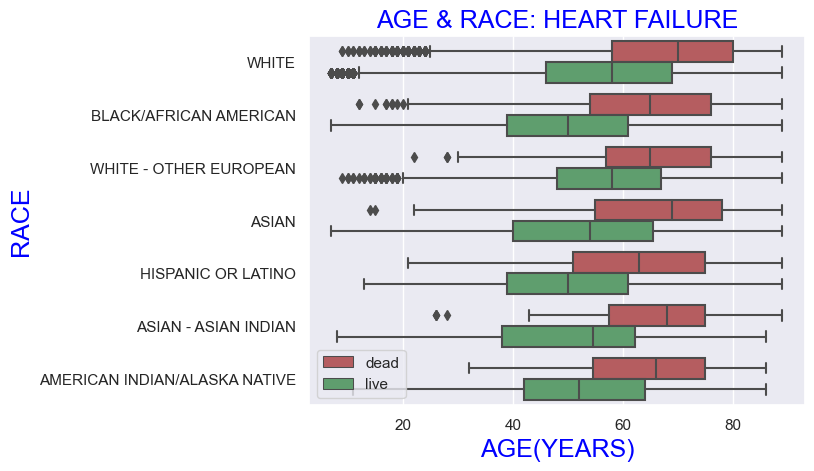

In [491]:
df_ra =pt_mer2[(pt_mer2['race'].isin(['WHITE','BLACK/AFRICAN AMERICAN', 'WHITE - OTHER EUROPEAN', 'HISPANIC OR LATINO','AMERICAN INDIAN/ALASKA NATIVE','ASIAN', 'ASIAN - ASIAN INDIAN']))]

df = df_ra.loc[df_ra['icd_i50']=='Positive']

my_pal = {dod_x: "r" if dod_x == "dead" else "g" for dod_x in df.dod_x.unique()}

sns.boxplot(data=df_ra, hue="dod_x", x="min_age", y="race", palette=my_pal)


plt.legend(loc='lower left')
plt.title('AGE & RACE: HEART FAILURE', fontsize = 18
           , color='blue' )
plt.xlabel('AGE(YEARS)', fontsize = 18
           , color='blue')
plt.ylabel('RACE', fontsize = 18
           , color='blue')

Text(0.5, 0, 'PERCENT OF TOTAL OBERVATIONS')

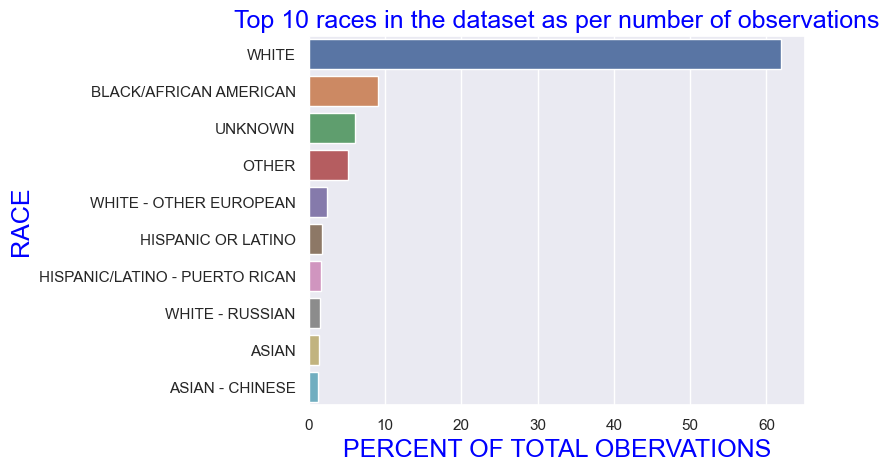

In [496]:
df = ((pt_mer2['race'].value_counts()/len(pt_mer2))*100).head(10).reset_index().rename(columns={'index': 'race',
                                                                                                'race':'percent_count'})
df
sns.barplot(data=df, y='race', x='percent_count' )
plt.title('Top 10 races in the dataset as per number of observations', fontsize=18, color='blue')
plt.ylabel('RACE', fontsize=18, color='blue')
plt.xlabel('PERCENT OF TOTAL OBERVATIONS', fontsize=18, color='blue')

In [84]:
# there are 33 races in the dataset

import seaborn as sns

In [97]:
race_per = ((mer['race'].value_counts()*100/len(mer)).to_frame().reset_index()
            .rename(columns={'indes':'race', 'race':'Counts'}))
race_per.head()

,index,Counts
0,WHITE,65.790082
1,BLACK/AFRICAN AMERICAN,12.776340
2,OTHER,3.091221
3,UNKNOWN,2.995366
4,WHITE - OTHER EUROPEAN,2.001963


<Axes: xlabel='icd_i50'>

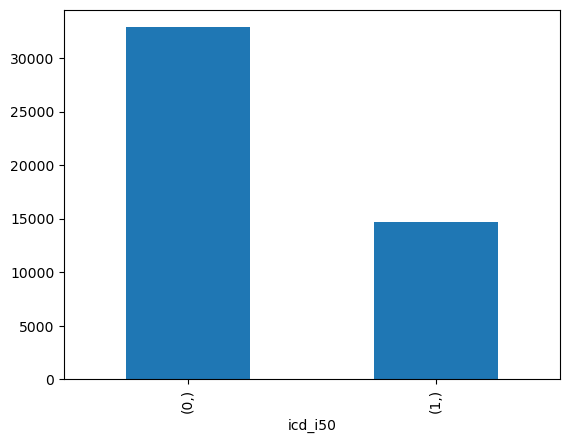

In [104]:
mer.loc[(mer['race']=='WHITE') & (mer['icd_e11']==1)][[ 'icd_i50']].value_counts().plot(kind='bar')

In [78]:
mer.groupby('icd_e11')['race'].value_counts().to_frame()

race
icd_e11 race                                             
0       WHITE                                      126106
        BLACK/AFRICAN AMERICAN                      18040
        UNKNOWN                                      5725
        OTHER                                        5242
        WHITE - OTHER EUROPEAN                       3975
...                                                   ...
1       WHITE - BRAZILIAN                             103
        SOUTH AMERICAN                                 88
        ASIAN - KOREAN                                 80
        MULTIPLE RACE/ETHNICITY                        75
        NATIVE HAWAIIAN OR OTHER PACIFIC ISLANDER      56

[66 rows x 1 columns]

In [113]:
query="""

SELECT a.subject_id, a.hadm_id, a.dischtime, a.admittime, a.race, ic.icd_E11, ic.icd_E78, ic.icd_E87, ic.icd_F32,
ic.icd_I16, ic.icd_I50, ic.icd_N17, ic.icd_Y92, ic.icd_Z85, p.dod, p.min_age
FROM admission as a
INNER JOIN ictarget as ic
ON a.subject_id = ic.subject_id
    AND a.hadm_id = ic.hadm_id
INNER JOIN patients as p
ON p.subject_id = a.subject_id

"""
# AND ic.hadm_id = a.hadm_id
# p.dod, p.min_age,
# INNER JOIN patient as p
# on a.subject_id = p.subject_id
# GROUP BY p.subject_id
# GROUP BY icd_E11
with sqlite3.connect('../data/ehr.sqlite') as db: 
    mer1 = pd.read_sql(query, db)
mer1
    

,subject_id,hadm_id,dischtime,admittime,race,icd_e11,icd_e78,icd_e87,icd_f32,icd_i16,icd_i50,icd_n17,icd_y92,icd_z85,dod,min_age
0,10000032,22841357,2180-06-27 18:49:00,2180-06-26 18:27:00,WHITE,0,0,1,0,0,0,0,0,0,2180-09-09 00:00:00,44
1,10000032,25742920,2180-08-07 17:50:00,2180-08-05 23:44:00,WHITE,0,0,1,0,0,0,0,0,0,2180-09-09 00:00:00,44
2,10000032,29079034,2180-07-25 17:55:00,2180-07-23 12:35:00,WHITE,0,0,1,0,0,0,0,0,0,2180-09-09 00:00:00,44
3,10000084,23052089,2160-11-25 14:52:00,2160-11-21 01:56:00,WHITE,0,1,0,0,0,0,0,0,1,2161-02-13 00:00:00,61
4,10000117,27988844,2183-09-21 16:30:00,2183-09-18 18:10:00,WHITE,0,1,0,0,0,0,0,1,0,0,46
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
263936,19999828,25744818,2149-01-18 17:00:00,2149-01-08 16:44:00,WHITE,1,0,1,0,0,0,0,1,0,0,35
263937,19999828,29734428,2147-08-04 18:10:00,2147-07-18 16:23:00,WHITE,1,0,0,0,0,0,0,1,0,0,35
263938,19999840,21033226,2164-09-17 13:42:00,2164-09-10 13:47:00,WHITE,0,1,0,0,1,0,0,0,0,2164-09-17 00:00:00,56
263939,19999840,26071774,2164-07-28 12:15:00,2164-07-25 00:27:00,WHITE,0,1,0,0,1,0,0,0,0,2164-09-17 00:00:00,56
